<a href="https://colab.research.google.com/github/lcbjrrr/ML315/blob/main/ML315_5_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest



This dataset seems suitable for exploring potential relationships between these factors and the likelihood of a fraudulent claim. For example, you might investigate if younger males with larger engines who haven't made a claim recently are more likely to file fraudulent claims.

* **age:** The age of the insurance policyholder.
* **is_male:** A binary indicator of the policyholder's gender (1 for male, 0 for not male).
* **engine_size:**  The size of the engine in the insured vehicle (the units are not specified but could be cubic centimeters or liters).
* **months_last_claim:** The number of months since the policyholder's last claim.
* **fraud:** A binary indicator of whether the claim was fraudulent (1 for fraudulent, 0 for not fraudulent).
"

In [2]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lcbjrrr/ML315/refs/heads/main/datasets/car_insurance_fraud.csv')
df.head()

,age,is_male,engine_size,months_last_claim,fraud
0,71,0,120,24,1
1,40,0,70,12,1
2,78,0,200,12,0
3,31,1,120,6,1
4,32,1,120,12,0


A train-test split is a crucial technique in machine learning used to evaluate a model's performance on unseen data. The dataset is divided into two subsets: a training set for model training and a testing set for evaluation. This prevents overfitting, where the model becomes too specialized to the training data. By using a separate testing set, we obtain a more realistic assessment of the model's generalization ability. It's essential to ensure a random split, consider data distribution, and potentially use stratified sampling for imbalanced datasets. To further enhance reliability, multiple train-test splits can be performed, and the average performance can be calculate"""


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['age','is_male','engine_size','months_last_claim']],df['fraud'] ,test_size=0.20)
X_train.head(3)

,age,is_male,engine_size,months_last_claim
3,31,1,120,6
10,51,1,120,12
33,18,0,200,6


A random forest is a powerful machine learning algorithm that uses a collection of decision trees to make predictions. Instead of relying on a single tree, which can be prone to errors, a random forest builds many trees, each trained on a random subset of the data and considering only a random subset of features at each decision point. This "randomness" creates diverse trees, reducing overfitting and improving overall accuracy. When making a prediction, each tree "votes," and the most popular outcome becomes the final prediction. This ensemble approach makes random forests robust, accurate, and capable of handling complex datasets with many features, though they can be less interpretable than single decision trees and more computationally intensive to train.

![](https://blog.neilblaze.live/121024925e84a526036a4ddd30484e15/rf03.gif)

A random forest trains multiple decision trees on random subsets of data and features. It combines their predictions through voting to improve accuracy and reduce overfitting.

We can calculate accuracy by dividing the number of correct predictions by the total number of predictions. It measures the overall correctness of the model.

In [4]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 5)
forest.fit(X_train,y_train)
train_accuracy= forest.score(X_train,y_train)*100
train_accuracy

96.25

`preds = forest.predict(X_test)` uses a trained random forest model (`forest`) to generate predictions (`preds`) on a set of test data (`X_test`).

In [5]:
preds = forest.predict(X_test)
preds

array([1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0])

We can calculate accuracy by dividing the number of correct predictions by the total number of predictions.

In [6]:
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test,preds)*100
test_accuracy

60.0

A confusion matrix is a table that summarizes the performance of a classification model on a set of test data. It shows how many times the model correctly predicted each class and how many times it made incorrect predictions.


[[8 3]
 [5 4]]


<Axes: >

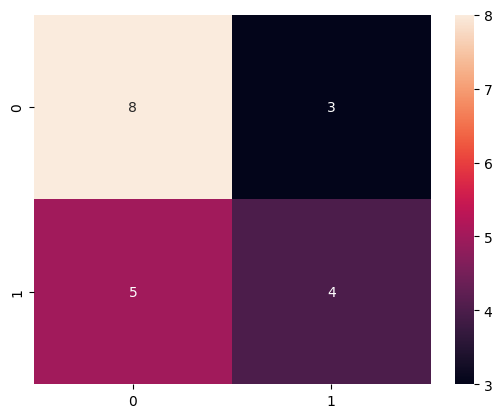

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test,preds)
print(cm)
sns.heatmap(cm, annot=True, fmt="d")

Precision and recall are two important metrics used to evaluate the performance of a classification model. They are particularly useful when dealing with imbalanced datasets.

- Precision measures the proportion of positive identifications that were actually correct. In other words, it tells us how accurate the positive predictions are.

- Recall measures the proportion of actual positive cases that were correctly identified. It tells us how well the model finds all the relevant cases.


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test,preds))


              precision    recall  f1-score   support

           0       0.62      0.73      0.67        11
           1       0.57      0.44      0.50         9

    accuracy                           0.60        20
   macro avg       0.59      0.59      0.58        20
weighted avg       0.60      0.60      0.59        20



Hyperparameter tuning is like fine-tuning the settings of a machine learning model to get the best performance. Unlike regular parameters that the model learns during training, hyperparameters are set before training and control how the model learns. Tuning them involves trying different combinations of these settings to find the ones that give the best results on unseen data."""


In [9]:

for n in range(5,50,1):
  forest = RandomForestClassifier(n_estimators = n)
  forest.fit(X_train,y_train)
  train_accuracy= forest.score(X_train,y_train)*100
  preds = forest.predict(X_test)
  test_accuracy = accuracy_score(y_test,preds)*100
  print(n,train_accuracy,test_accuracy)

5 95.0 55.00000000000001
6 92.5 70.0
7 93.75 50.0
8 96.25 60.0
9 98.75 55.00000000000001
10 93.75 55.00000000000001
11 96.25 55.00000000000001
12 97.5 55.00000000000001
13 98.75 50.0
14 97.5 45.0
15 97.5 65.0
16 97.5 65.0
17 96.25 60.0
18 97.5 65.0
19 98.75 55.00000000000001
20 98.75 65.0
21 98.75 55.00000000000001
22 98.75 60.0
23 97.5 60.0
24 98.75 55.00000000000001
25 98.75 55.00000000000001
26 98.75 65.0
27 98.75 55.00000000000001
28 97.5 55.00000000000001
29 98.75 55.00000000000001
30 98.75 65.0
31 98.75 40.0
32 98.75 65.0
33 98.75 60.0
34 98.75 55.00000000000001
35 98.75 55.00000000000001
36 98.75 60.0
37 98.75 60.0
38 98.75 55.00000000000001
39 98.75 65.0
40 97.5 55.00000000000001
41 98.75 65.0
42 98.75 50.0
43 98.75 45.0
44 97.5 60.0
45 98.75 60.0
46 98.75 55.00000000000001
47 97.5 55.00000000000001
48 98.75 65.0
49 98.75 55.00000000000001


The chart displays feature importances, where the y-axis labels are the column names from X_train (features), and the x-axis values are the corresponding feature importance scores from a trained forest model. This visualization allows for quick assessment of which features contribute most significantly to the model's predictions

In [10]:
forest.feature_importances_

array([0.63683951, 0.07307619, 0.15491505, 0.13516925])

<BarContainer object of 4 artists>

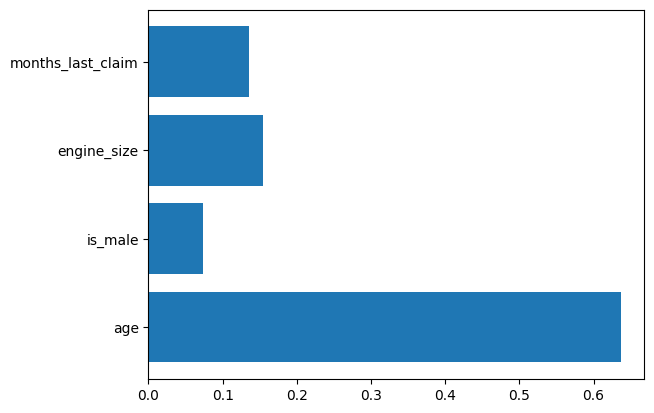

In [13]:
import matplotlib.pyplot as plt
plt.barh(X_train.columns, forest.feature_importances_)